# Chapter 3 - Classification

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## Setup

This project requires Python 3.7 or above: (i got 3.9.13)

In [2]:
import sys
assert sys.version_info >= (3, 9) # This script requires at least Python 3.9

It also requires Scikit-Learn ≥ 1.0.1:

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Define default font sizes to make the figures prettier:

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Create the images/classification folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res:

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    # print(f"Saving figure {fig_id} to {path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [7]:
print(mnist.data.shape)

(70000, 784)


In [8]:
print(mnist.target.shape)

(70000,)


In [9]:
print(mnist.target_names)

['class']


In [10]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [11]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X.shape, y.shape

((70000, 784), (70000,))

In [14]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [15]:
28 * 28

784

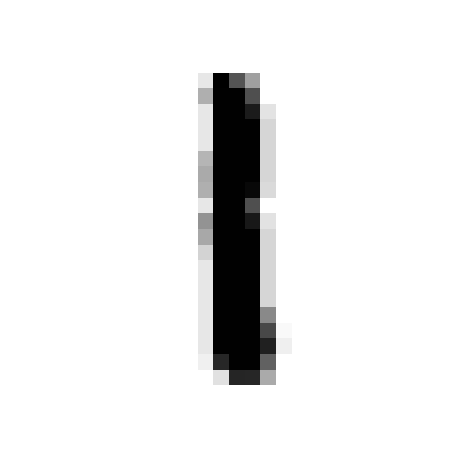

In [16]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[50600]
plot_digit(some_digit)
save_fig("some_digit_plot")     # extra code
plt.show()

In [17]:
y[50600]

'1'

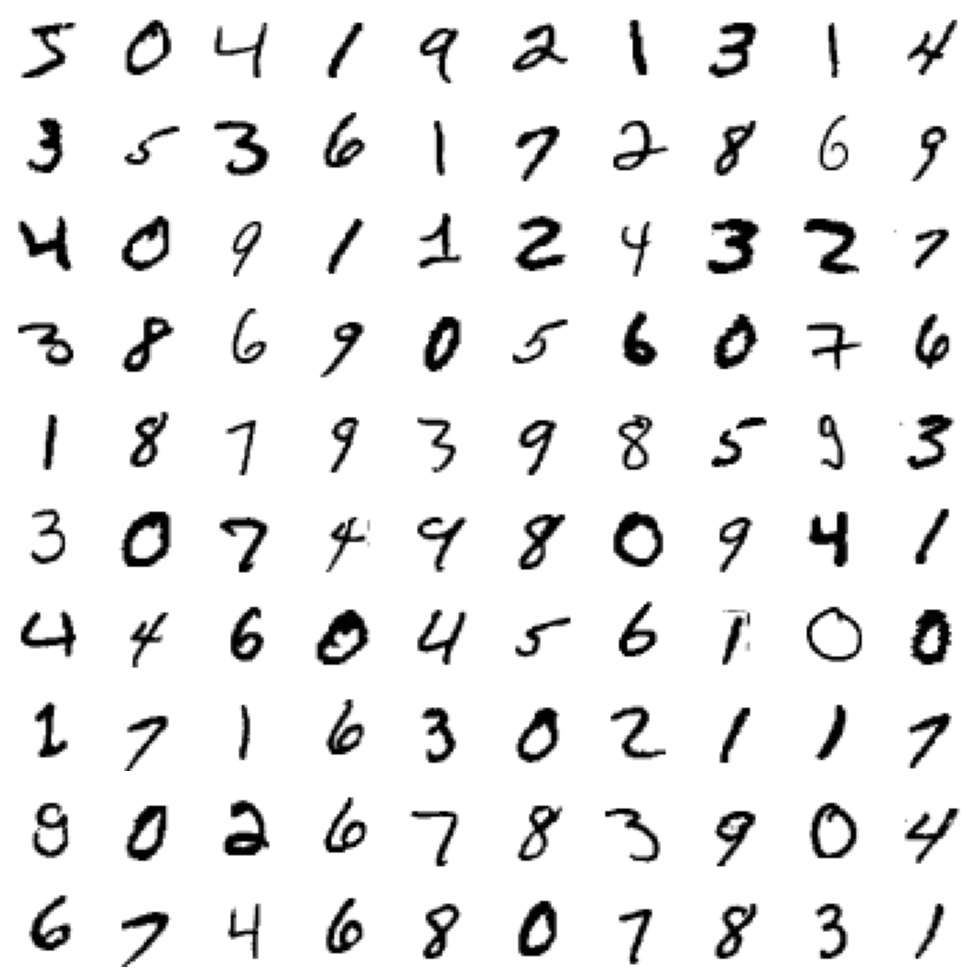

In [18]:
# extra code
plt.figure(figsize=(10,10))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10,10,idx+1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
save_fig("some_digits_plot")
plt.show()

Split training & testing sets

In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [20]:
y_train_one_classes = (y_train == '1')         # True for all 1s, False for all others
y_test_one_classes = (y_test == '1')

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_one_classes)

SGDClassifier(random_state=42)

In [22]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

### Measuring Accuracy Using Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_one_classes, cv=3, scoring="accuracy")

array([0.9878 , 0.98095, 0.99005])

##### Implementing Cross-Validation

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)   # 3-fold cross validation
                                        # add shuffle=True if you want to shuffle the data/ dataset not shuffled

for train_index, test_index in skfolds.split(X_train, y_train_one_classes):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_one_classes[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_one_classes[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9878
0.98095
0.99005


In [32]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_one_classes)
print(any(dummy_clf.predict(X_train)))

False


In [33]:
cross_val_score(dummy_clf, X_train, y_train_one_classes, cv=3, scoring="accuracy")

array([0.88765, 0.88765, 0.8876 ])

### Confusion Matrix

In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_one_classes, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_one_classes, y_train_pred)
cm

array([[52917,   341],
       [  483,  6259]])

In [29]:
y_train_perfect_predictions = (y_train_one_classes)
confusion_matrix(y_train_one_classes, y_train_perfect_predictions)

array([[53258,     0],
       [    0,  6742]])

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier.

### `precision` = `TP/(TP+FP)`

_TP is the number of true positives, and FP is the number of false positives._

A trivial way to have perfect precision is to create a classifier that always makes negative predictions, except for one single positive prediction on the instance it’s most confident about. If this one prediction is correct, then the classifier has 100%
precision (precision = 1/1 = 100%). Obviously, such a classifier would not be very useful, since it would ignore all but one positive instance. So, `precision` is typically used along with another metric named `recall`, also called `sensitivity` or the `true positive rate` (TPR): this is the ratio of positive instances that are correctly detected by the classifier.

### `recall` =  `TP/(TP+FN)`

_FN is, of course, the number of false negatives._

### Precision and Recall

In [34]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_one_classes, y_train_pred)

0.9483333333333334

In [35]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.9483333333333334

In [36]:
recall_score(y_train_one_classes, y_train_pred)

0.9283595372293089

In [37]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.9283595372293089

It is often convenient to combine `precision` and `recall` into a single metric called the `F1 score`, especially when you need a _single metric to compare two classifiers_. The F1 score is the *harmonic mean of precision and recall*.

Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and
precision are high.

In [38]:
from sklearn.metrics import f1_score
f1_score(y_train_one_classes, y_train_pred)

0.9382401439064609